In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
nba = pd.read_csv('/Users/bowieliu/Downloads/NBA_Dataset.csv')

In [3]:
nba.head()
#data contains all player statistics from 1982 to 2021

,Unnamed: 0,season,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,...,usg_pct,ows,dws,ws,ws_per_48,obpm,dbpm,bpm,vorp,award_share
0,0,1982,Kareem Abdul-Jabbar*,C,34,LAL,76,76.0,35.2,9.9,...,25.6,6.9,3.9,10.7,0.192,3.8,1.2,5.0,4.7,0.0
1,1,1982,Alvan Adams,C,27,PHO,79,75.0,30.3,6.4,...,22.8,2.5,4.7,7.2,0.144,1.4,2.2,3.6,3.4,0.0
2,2,1982,Mark Aguirre,SF,22,DAL,51,20.0,28.8,7.5,...,29.8,1.0,0.8,1.9,0.061,2.3,-1.6,0.7,1.0,0.0
3,3,1982,Danny Ainge,SG,22,BOS,53,1.0,10.6,1.5,...,21.5,-0.3,0.8,0.5,0.042,-3.7,1.0,-2.7,-0.1,0.0
4,4,1982,Tiny Archibald*,PG,33,BOS,68,51.0,31.9,4.5,...,17.9,3.4,1.8,5.2,0.115,1.4,-1.3,0.1,1.1,0.0


In [4]:
#Three pointers attempted over the years
nba_season3 = nba.groupby('season').fg3a_per_g.sum().reset_index()
nba_season3.head()

,season,fg3a_per_g
0,1982,63.5
1,1983,63.8
2,1984,65.5
3,1985,87.1
4,1986,94.9


In [5]:
#Two pointers attempted over the years
nba_season2 = nba.groupby('season').fg2a_per_g.sum().reset_index()
nba_season2.head()

,season,fg2a_per_g
0,1982,2346.0
1,1983,2390.8
2,1984,2257.4
3,1985,2364.6
4,1986,2395.2


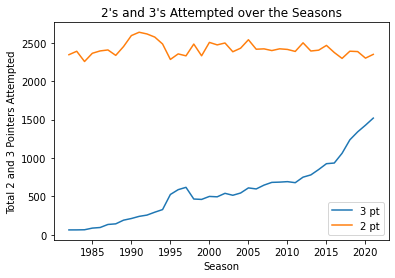

In [6]:
#Graph of 3's over the years
plt.plot(nba_season3['season'], nba_season3['fg3a_per_g'], label = "3 pt")
plt.plot(nba_season2['season'], nba_season2['fg2a_per_g'], label = "2 pt")
plt.title("2's and 3's Attempted over the Seasons")
plt.xlabel("Season")
plt.ylabel("Total 2 and 3 Pointers Attempted")
plt.legend()
#2's stay relatively constant and 3's increases draastically over the years

In [7]:
#Increase of 3's over each decade
decade82_90 = nba.loc[(nba['season'] >= 1982) & (nba['season'] <= 1989), ['player', 'season', 'fg3a_per_g']]
decade90_99 = nba.loc[(nba['season'] >= 1990) & (nba['season'] <= 1999), ['player', 'season', 'fg3a_per_g']]
decade00_09 = nba.loc[(nba['season'] >= 2000) & (nba['season'] <= 2009), ['player', 'season', 'fg3a_per_g']]
decade10_19 = nba.loc[(nba['season'] >= 2010) & (nba['season'] <= 2019), ['player', 'season', 'fg3a_per_g']]
decade20_21 = nba.loc[(nba['season'] >= 2020) & (nba['season'] <= 2021), ['player', 'season', 'fg3a_per_g']]

In [8]:
#number of 3's attempted from 1982 to 1990
total3_82_90 = decade82_90.fg3a_per_g.sum()
total3_82_90

842.4000000000001

In [9]:
#number of 3's attempted from 1990 to 1999
total3_90_99 = decade90_99.fg3a_per_g.sum()
total3_90_99

3989.2999999999997

In [10]:
#number of 3's attempted from 2000 to 2009
total3_00_09 = decade00_09.fg3a_per_g.sum()
total3_00_09

5817.799999999999

In [11]:
#number of 3's attempted from 2010 to 2019
total3_10_19 = decade10_19.fg3a_per_g.sum()
total3_10_19

9253.3

In [12]:
#number of 3's attempted from 2020 to 2021
total3_20_21 = decade20_21.fg3a_per_g.sum()
total3_20_21

2947.8

In [13]:
#3pt taken increase drastically each decade
#Even with shorten covid season during 2020, the total 3pt taken in 2020 and 2021 combined is more than 3 times of 3pt taken from 1982 to 1990

In [14]:
#player that attempted the most 3pt per game
player_3_att = nba.groupby('player').fg3a_per_g.mean().reset_index().sort_values('fg3a_per_g', ascending=False)
player_3_att.head()

,player,fg3a_per_g
2770,Stephen Curry,8.583333
617,Damian Lillard,8.111111
1933,Luka Dončić,8.100000
188,Armoni Brooks,7.900000
1308,James Harden,7.683333


In [15]:
#player that make the most 3pt per game on average
player_3_make = nba.groupby('player').fg3_per_g.mean().reset_index().sort_values('fg3_per_g', ascending=False)
player_3_make.head()

,player,fg3_per_g
2770,Stephen Curry,3.566667
617,Damian Lillard,3.077778
372,Buddy Hield,3.040000
188,Armoni Brooks,3.000000
1796,Klay Thompson,2.912500


In [16]:
#teams that attempted the most 3's
team_3_att = nba.groupby('team_id').fg3a_per_g.mean().reset_index().sort_values('fg3a_per_g', ascending=False)
team_3_att.head()

,team_id,fg3a_per_g
6,CHO,2.398077
2,BRK,2.366438
24,NOP,2.251220
26,OKC,1.955851
35,TOR,1.710112


In [17]:
#teams that make the most 3's
team_3_make = nba.groupby('team_id').fg3_per_g.mean().reset_index().sort_values('fg3_per_g', ascending=False)
team_3_make.head()

,team_id,fg3_per_g
6,CHO,0.843269
2,BRK,0.815753
24,NOP,0.795935
26,OKC,0.674468
35,TOR,0.610112


In [18]:
#big man taking more 3's?
nba_big = nba.loc[(nba['pos'] == 'C') | (nba['pos'] == 'PF')]
nba_big.head()

,Unnamed: 0,season,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,...,usg_pct,ows,dws,ws,ws_per_48,obpm,dbpm,bpm,vorp,award_share
0,0,1982,Kareem Abdul-Jabbar*,C,34,LAL,76,76.0,35.2,9.9,...,25.6,6.9,3.9,10.7,0.192,3.8,1.2,5.0,4.7,0.0
1,1,1982,Alvan Adams,C,27,PHO,79,75.0,30.3,6.4,...,22.8,2.5,4.7,7.2,0.144,1.4,2.2,3.6,3.4,0.0
5,5,1982,Dennis Awtrey,C,33,POR,10,3.0,12.1,0.5,...,8.5,-0.1,0.0,0.0,-0.013,-4.8,-0.3,-5.1,-0.1,0.0
6,6,1982,Carl Bailey,C,23,POR,1,0.0,7.0,1.0,...,17.6,0.0,0.0,0.0,-0.268,-5.0,-0.1,-5.1,0.0,0.0
7,7,1982,James Bailey,PF,24,TOT,77,0.0,19.1,3.4,...,20.3,0.2,2.7,2.9,0.094,-3.0,1.0,-2.0,0.0,0.0


In [19]:
nba_big3 = nba_big.groupby('season').fg3a_per_g.sum().reset_index()
nba_big3.head()

,season,fg3a_per_g
0,1982,3.9
1,1983,6.0
2,1984,5.6
3,1985,4.6
4,1986,7.2


Text(0, 0.5, 'Total 3 Pointers Attempted')

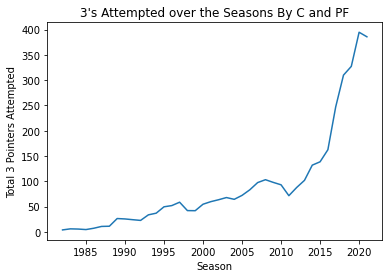

In [20]:
plt.plot(nba_big3['season'], nba_big3['fg3a_per_g'], label = "3 pt")
plt.title("3's Attempted over the Seasons By C and PF")
plt.xlabel("Season")
plt.ylabel("Total 3 Pointers Attempted")
#The total 3 pointers attempted by Bigs increase significantly as well over the years

In [21]:
#big man takes the most 3's
nba_big_most3 = nba_big.groupby('player').fg3a_per_g.sum().reset_index().sort_values('fg3a_per_g', ascending=False)
nba_big_most3.head()

,player,fg3a_per_g
366,Dirk Nowitzki,71.4
758,Kevin Love,64.6
1130,Ryan Anderson,60.3
76,Antoine Walker,56.9
1060,Rasheed Wallace,45.5


In [ ]:
#I want to find the most efficient player in NBA history.
#To do that, I need to exclude players that play under certain minutes
#Then, I can find the actual most efficient player

In [38]:
#average minute played
nba_min = nba.mp.mean()
nba_min
#average min played per season is 1269 min

1268.6552188158203

In [42]:
#player above min played
nba_min_over = nba.loc[nba['mp'] >= 1269, ['player', 'per']]
nba_min_over.head()
#we want players that played over the average minutes per season to be subset for player efficiency rating

,player,per
0,Kareem Abdul-Jabbar*,23.4
1,Alvan Adams,18.6
2,Mark Aguirre,17.3
4,Tiny Archibald*,14.3
7,James Bailey,13.3


In [44]:
#player efficiency rating
#FORMULA = (PTS + REB + AST + STL + BLK − Missed FG − Missed FT - TO) / GP
nba_eff = nba_min_over.groupby('player').per.mean().reset_index().sort_values('per', ascending=False)
nba_eff.head(10)

,player,per
1008,Michael Jordan*,27.769231
889,LeBron James,27.316667
68,Anthony Davis,27.262500
1500,Zion Williamson,27.100000
1291,Shaquille O'Neal*,26.756250
716,Joel Embiid,26.275000
1080,Nikola Jokić,25.783333
338,David Robinson*,25.669231
823,Kevin Durant,25.154545
242,Chris Paul,24.668750
